# Reproduce Gapminder

### World Bank - World Development Indicators
https://databank.worldbank.org/source/world-development-indicators

In [37]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

In [38]:
filename = '../Opdrachten/datasets/World Bank DataBank World Development Indicators/indicators_selected.csv'

df = pd.read_csv(filename)
df

,Country Name,Year,"Population, total","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Continent
0,Afghanistan,1974,11869879.0,7.526,39.550,Asia
1,Afghanistan,1975,12157386.0,7.542,40.100,Asia
2,Afghanistan,1976,12425267.0,7.561,40.645,Asia
3,Afghanistan,1977,12687301.0,7.591,41.228,Asia
4,Afghanistan,1978,12938862.0,7.599,40.271,Asia
...,...,...,...,...,...,...
10745,Zimbabwe,2019,15354608.0,3.599,61.292,Africa
10746,Zimbabwe,2020,15669666.0,3.545,61.124,Africa
10747,Zimbabwe,2021,15993524.0,3.491,59.253,Africa
10748,Zimbabwe,2022,16320537.0,3.437,59.391,Africa


In [39]:
year = 2020

df_year = df.query(f'Year=={year}')
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 46 to 10746
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country Name                              215 non-null    object 
 1   Year                                      215 non-null    int64  
 2   Population, total                         215 non-null    float64
 3   Fertility rate, total (births per woman)  209 non-null    float64
 4   Life expectancy at birth, total (years)   207 non-null    float64
 5   Continent                                 215 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.8+ KB


In [41]:
df_year['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

### With matplotlib

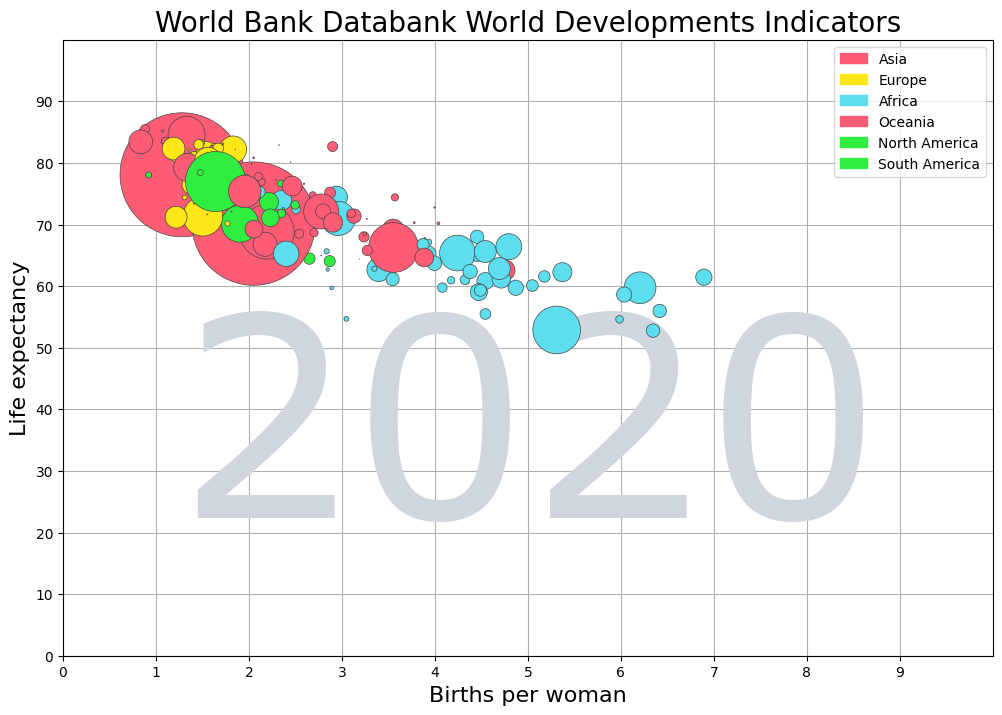

In [45]:
green = '#30ee40'
yellow = '#fee717'
red = '#fe5c75'
blue = '#5cdeee'

continent_colors = {
        'Asia': red, 
        'Europe': yellow, 
        'Africa': blue, 
        'Oceania': red, 
        'North America': green,
        'South America': green,
}

colors = df_year['Continent'].replace(continent_colors).values

scale_factor = 8000 / df['Population, total'].max()
sizes = df_year['Population, total'].values * scale_factor

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter('Fertility rate, total (births per woman)', 
           'Life expectancy at birth, total (years)', 
           data = df_year,
           c = colors,
           s = sizes,
           edgecolor = '#444',
           linewidth = 0.5,
           zorder= 10,
           label = None)

ax.set_title('World Bank Databank World Developments Indicators', fontsize=20)
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
ax.set_xticks(range(0, 10))
ax.set_yticks(range(0, 100, 10))
ax.set_xlabel('Births per woman', fontsize=16)
ax.set_ylabel('Life expectancy', fontsize=16)
ax.text(0.5, 0.35, str(year), 
        transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center',
        fontfamily='verdana', fontsize=200, color='#cfd6de')
ax.grid()
ax.set_axisbelow(True)
patches = [mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
ax.legend(handles=patches)

fig.savefig('gapminder.png')
plt.show()